# Hands on for SVM

## Part 1: Classification

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,0,0,0,1,1,1,1,1,1,1,1,1]

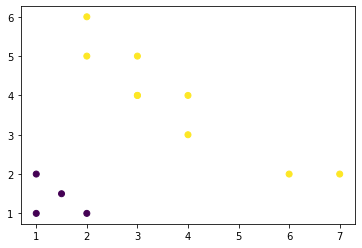

In [3]:
X_x1 = X[:,0]
X_x2 = X[:,1]
plt.scatter(X_x1, X_x2, c = y)
plt.show()

In [4]:
svcLinear =  SVC(kernel='linear').fit(X, y)
svcLinear.coef_, svcLinear.intercept_

(array([[0.49989823, 0.49989823]]), array([-2.49953185]))

$g(x) = w_1 x_1 + w_2 x_2 + w_0$

$x_2 = -(w_0 + w_1 x_1)/w_2$

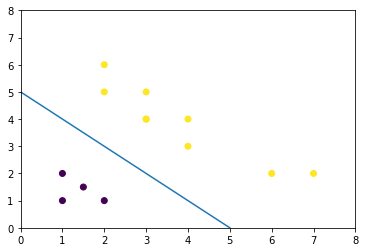

In [5]:
x1 = np.array([0, 5])
x2 = -1 *(svcLinear.intercept_ + svcLinear.coef_[0][0] * x1)/svcLinear.coef_[0][1]
plt.plot(x1, x2)
plt.scatter(X_x1, X_x2, c = y)
plt.axis([0, 8, 0, 8])
plt.show()

Classification on iris dataset

In [6]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
data = datasets.load_iris()
x = data.data[:,0:2]
y = data.target

In [8]:
x_train ,x_test,y_train,y_test = train_test_split(x,y)

Here, SVM() uses one Vs one multiclass classification

In [9]:
clf1 = svm.SVC(C = 1,kernel = 'linear')
clf1.fit(x,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
clf1.score(x_test,y_test)

0.8157894736842105

In [11]:
def makegrid(x1, x2, h = 0.02):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    a = np.arange(x1_min,x1_max,h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a, b)
    return xx, yy

Decision Boundary using linear kernel

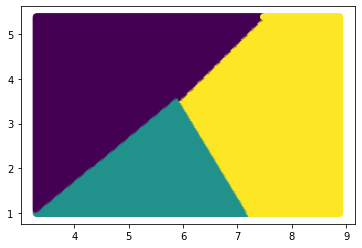

In [12]:
xx, yy = makegrid(x[:, 0], x[:, 1])
predictions = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

Nonlinear SVM

In [13]:
clf = svm.SVC()
clf.fit(x,y)

C:\Users\chenz1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
clf.score(x_test,y_test)

0.8157894736842105

Decision Boundary using RBF or Gaussian kernal

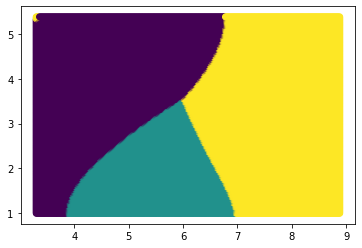

In [15]:
xx, yy = makegrid(x[:, 0], x[:, 1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

## Part 1: Regression

In [16]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [17]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

In [18]:
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

In [19]:
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin.fit(X,y)
svr_rbf.fit(X,y)

y_lin = svr_lin.predict(X)
y_rbf = svr_rbf.predict(X)

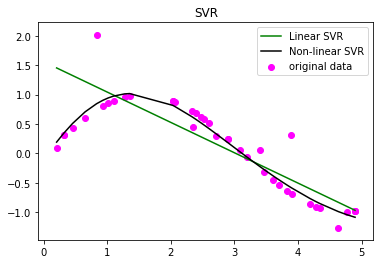

In [20]:
# Visualization
plt.plot(X, y_lin, color = 'green')
plt.plot(X, y_rbf, color = 'black')
plt.scatter(X,y,color = 'magenta')
plt.title('SVR')
plt.legend(['Linear SVR', 'Non-linear SVR', 'original data'])
plt.show()